For input to CNN:
Only MFCCs are extracted over 3 second segmented of the audio clip(1 song = 10 parts of 3 seconds each)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import json
import os
import math
import librosa

In [ ]:
song='/content/drive/My Drive/RP/genres/blues/blues.00003.wav'


In [ ]:
# load audio file with Librosa
signal, sample_rate = librosa.load(song, sr=22050)


In [ ]:
MFCCs= librosa.feature.mfcc(signal, sample_rate, n_fft=2048, hop_length=512, n_mfcc=13)


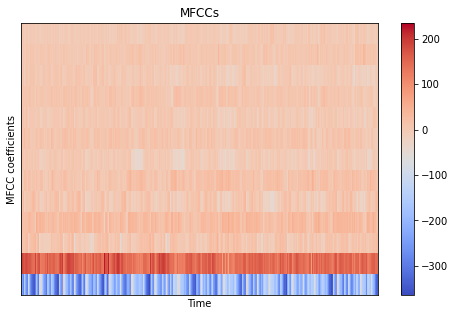

In [ ]:
plt.figure(figsize=(8,5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=512)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()



In [ ]:
song_dir ='/content/drive/My Drive/RP/genres'
datafile="data_10.json"   #Path to json file to save MFCCs
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

In [ ]:
#extract mfcc and save them in json file with labels

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):# num_segments = no. of segments to divide sample tracks into
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensur its not a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		             # load audio file iwth librosa
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(song_dir, datafile, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/RP/genres/country/country.00007.wav, segment:7
/content/drive/My Drive/RP/genres/country/country.00007.wav, segment:8
/content/drive/My Drive/RP/genres/country/country.00007.wav, segment:9
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:1
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:2
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:3
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:4
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:5
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:6
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:7
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:8
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:9
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:10
/content/drive/My Drive/R

In [ ]:
save_mfcc(song_dir,json_path, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/RP/genres/country/country.00007.wav, segment:7
/content/drive/My Drive/RP/genres/country/country.00007.wav, segment:8
/content/drive/My Drive/RP/genres/country/country.00007.wav, segment:9
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:1
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:2
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:3
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:4
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:5
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:6
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:7
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:8
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:9
/content/drive/My Drive/RP/genres/country/country.00003.wav, segment:10
/content/drive/My Drive/R

In [ ]:
import shutil
shutil.move("/content/data_10.json", "/content/drive/MyDrive") 

'/content/drive/MyDrive/data_10.json'